# Exploring Bias in Fandango Movie Ratings

> This project explores whether or not Fandango artifically displays higher review ratings to sell more movie tickets, as compared to other rating sites, such as RottenTomatoes or MetaCritic. 

- toc: true
- badges: true
- comments: false
- categories: [data visualization, pandas, seaborn]
- image: images/movies.jpg


## Problem Definition 

>Is there a conflict of interest for a website that both sells movie tickets and displays review ratings? More specifically, does Fandango artifically display higher review ratings to seel more movie tickets? 


**Sources:**
- This project was inspired by an article by 538, published in 2015, which can be found [here](https://fivethirtyeight.com/features/fandango-movies-ratings/). 
- Much of my code below is adapted from a capstone project by Jose Portilla in his course "2022 Python for Machine Learning & Data Science Masterclass" on [Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

**Note:** Fandango has 2 rating systems: 

- **Stars:** rating in stars 0-5 displayed on their website's HTML

- **Rating:** actual true rating numerically shown on the movie's page. 

## Import Libraries & Data

In [ ]:
# collapse-hide
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data

**Note:** there are 2 primary data sources, both available from 538's  [github](https://github.com/fivethirtyeight/data)

> The first dataset contains every film that has a Rotten Tomatoe's rating, a RT User rating, and a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.  Data from Fandango was pulled Aug. 24, 2015

In [ ]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


The Fandango dataset contains every film 538 pulled from Fandango

- **Film:** the movie

- **Stars:** the number of stars presented on Fandango.com

- **Rating:** the Fandango ratingValue for the film, as pulled from the HTML of each page (this is the actual average score the movie obtained)

- **Votes:** the number of people who had reviewed the film at the time it was pulled. 

In [ ]:
fandango = pd.read_csv("fandango_scrape.csv")

## Exploratory Data Analysis

First, let's explore the Fandango dataset

In [ ]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


Below, a scatterplot shows the relationship between rating and votes. 

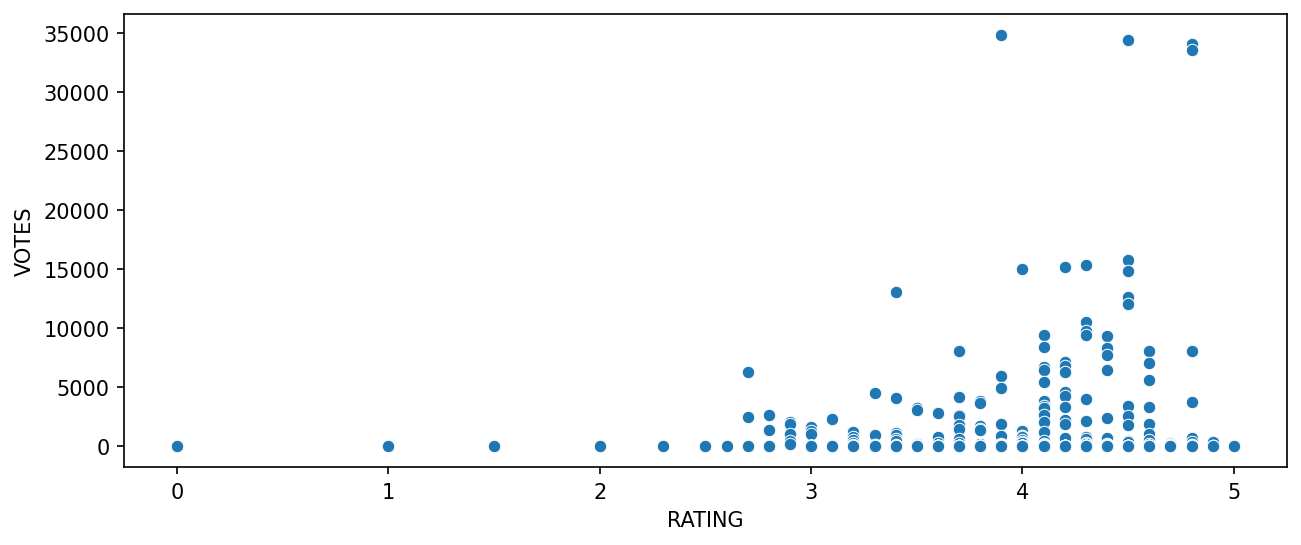

In [ ]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, x='RATING', y='VOTES'); 

Next, the correlation between the columns is shown: 

In [ ]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Now, a new column (YEAR) is created in the dataframe from the year in the title strings, as the total value counts are visualized. 

In [ ]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [ ]:
fandango['YEAR'].value_counts()

2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: YEAR, dtype: int64

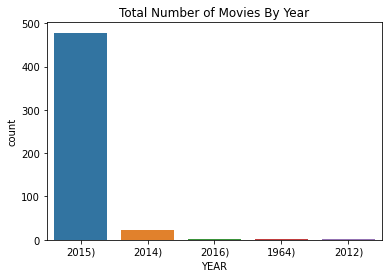

In [ ]:
p = sns.countplot(data=fandango, x='YEAR'); 
p.set_title('Total Number of Movies By Year'); 

The 10 movies with the highest number of votes are: 

In [ ]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


And the number of movies with zero votes are: 

In [ ]:
no_votes = fandango['VOTES'] == 0
no_votes.sum()

69

Now create a new dataframe of only reviewed films (by removing any films that have zero votes)

In [ ]:
fan_reviewed = fandango[fandango['VOTES']>0]

The article mentioned above discusses the fact that true user ratings may be slightly different than the rating shown to a user (due to HTML and star rating displays). 

- Can create a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from the votes (RATING)

- The KDE's are clipped to 0-5

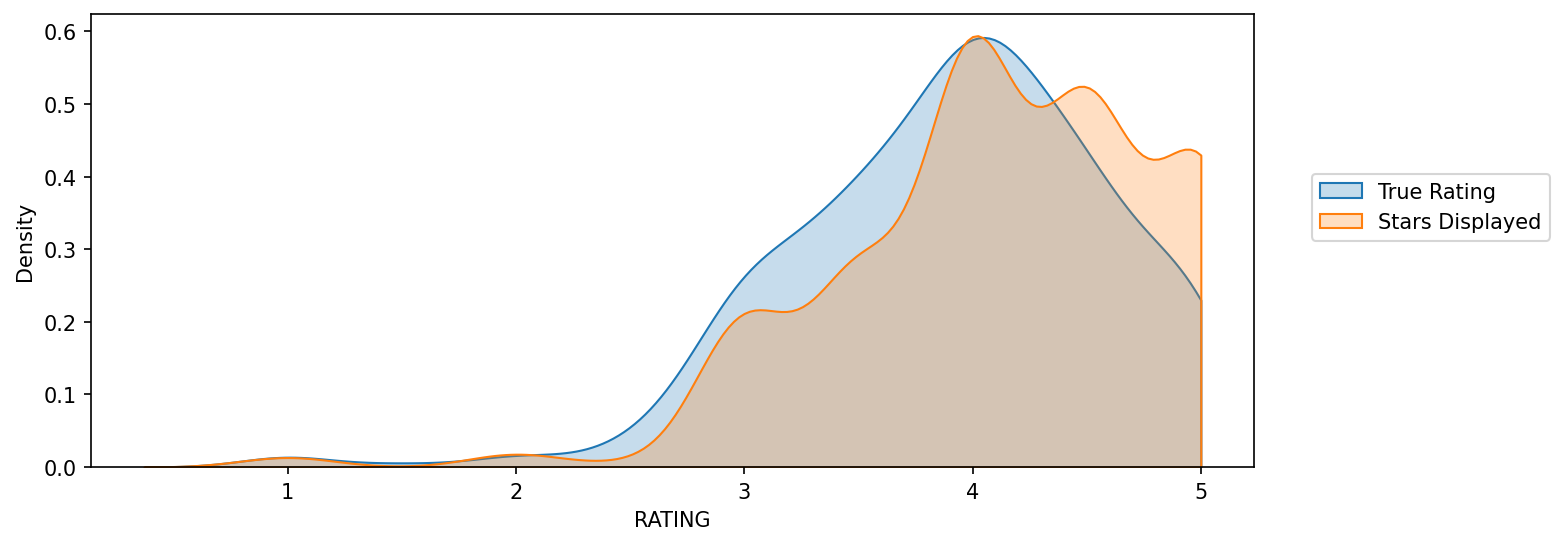

In [ ]:
plt.figure(figsize=(10,4), dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', 
                    clip=[0,5],
                    fill=True,
                    label = 'True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', 
                    clip=[0,5],
                    fill=True, 
                    label = 'Stars Displayed')
plt.legend(loc=(1.05,0.5));

So, it seems the stars displayed are slightly higher than the true ratings (which may just be due to how the stars are calculated and displayed in the HTML). 

Below, we quantify the discrepency. A new column of the difference between the two is created, and the difference is rounded to the nearest decimal point: 

In [ ]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS'] - fan_reviewed['RATING']
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

In [ ]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


Next, a countplot is used to display the number of times a certain difference occurs

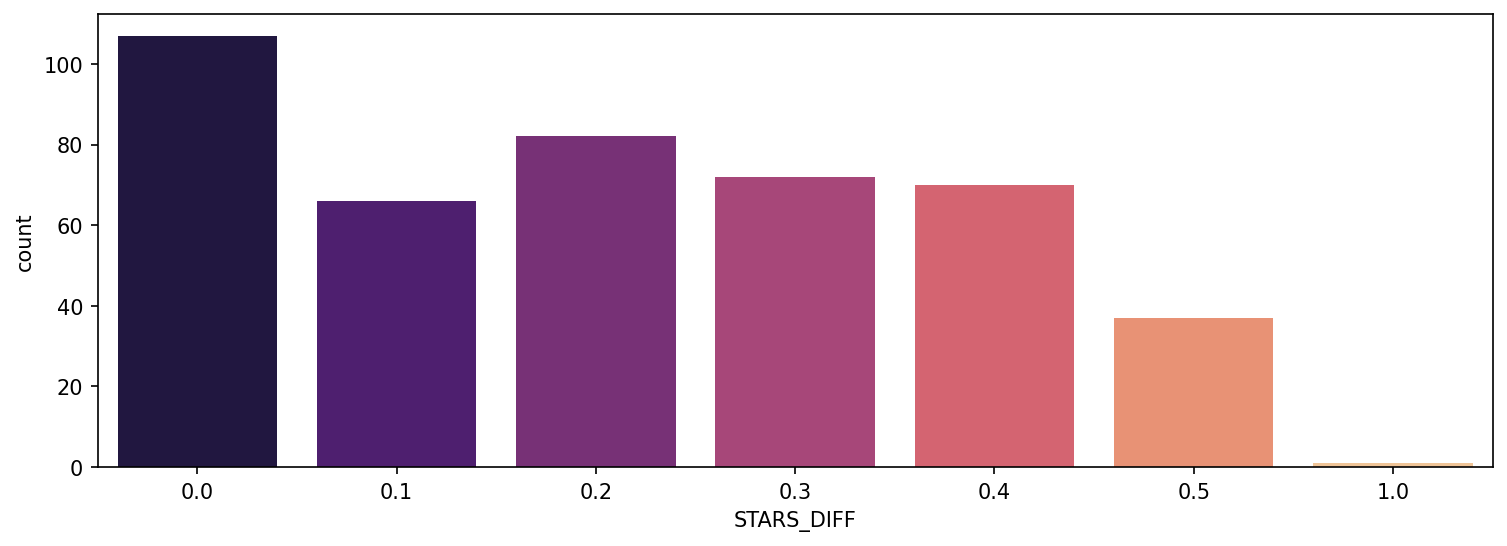

In [ ]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma'); 

It seems that one move was displaying a 1-star difference from its true rating. That movie is: 

In [ ]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


Of course, it only had 2 votes!

## Comparison of Fandango Ratings to Other Sites

Below, the Fandango ratings are compared to other the ratings from other sites. 

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

First, the data from Rotten Tomatoes (RT) is examined. RT has 2 sets of reviews: their critics reviews & their user reviews. 

Below shows a scatterplot exploring the relationship between these 2 reviews: 

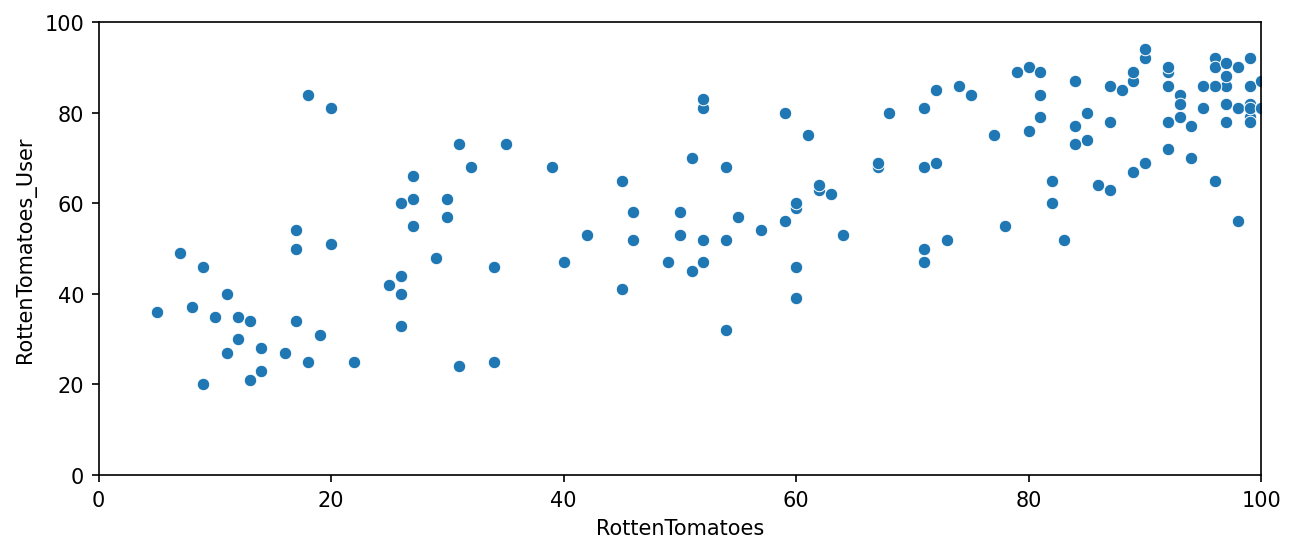

In [ ]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100); 

Next, the difference between the RT critics and users is quantified, by looking at their difference. A difference of 0 means the reviews match. 

In [ ]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

The mean absolute difference between RT critic and user scores is: 

In [ ]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

Next, the distribution of the differences between the RT critics and users is displayed (using KDE and histogram). 

> Note: negative scores indicate that the users rated the film much higher than the critics. 

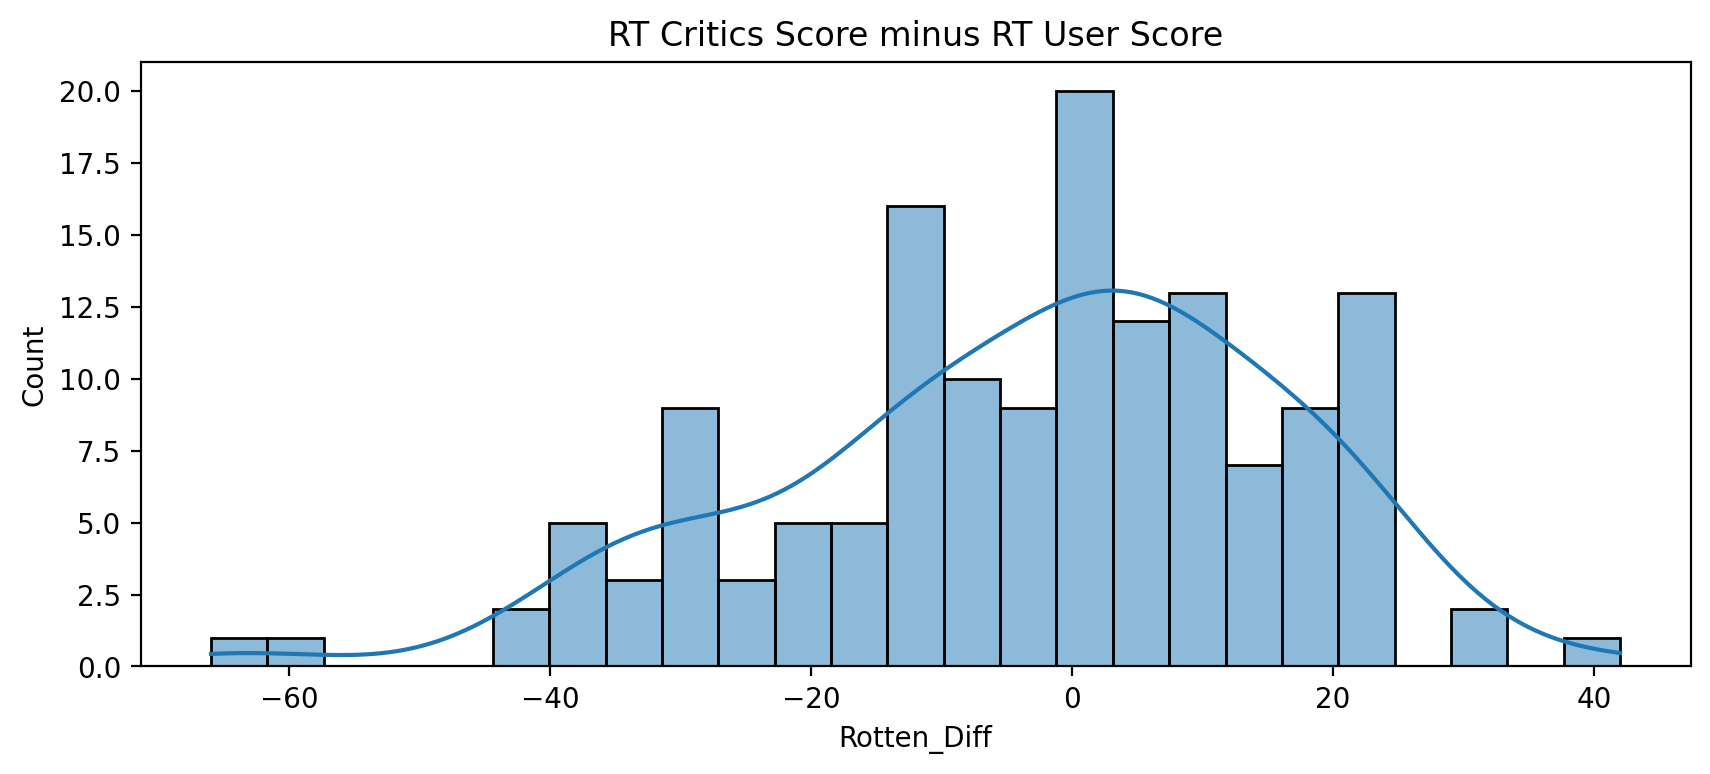

In [ ]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.title('RT Critics Score minus RT User Score'); 

Next, the absolute value difference between the RT critics and users scores is shown: 

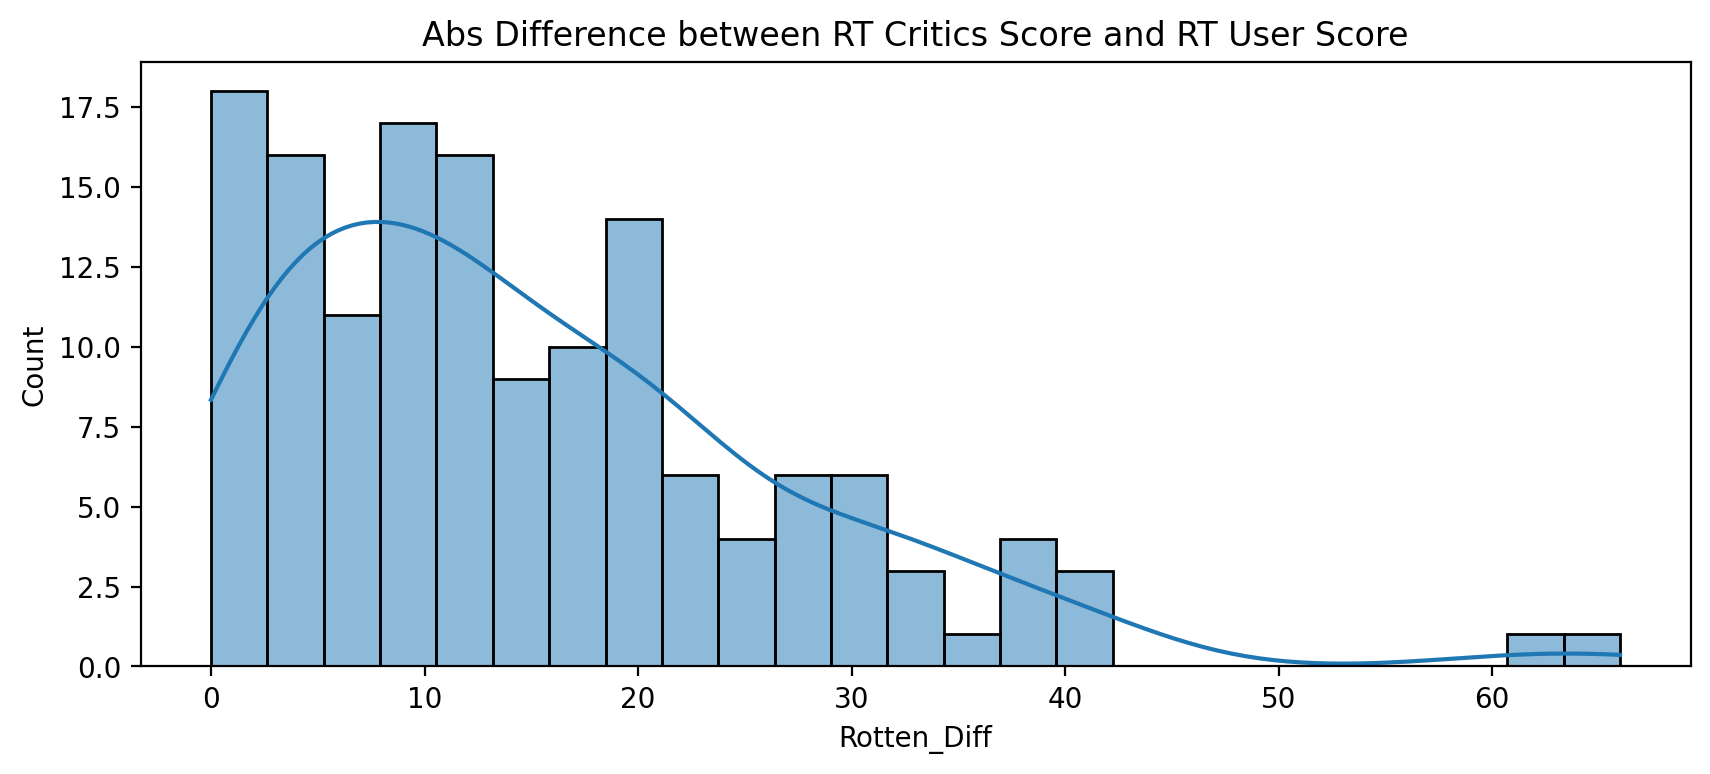

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs),bins=25,kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score");

Now, we'll try to find out which movies are creating the largest differences. 

First, show the top 5 movies with the largest negative difference between Users and RT critics (meaning that users rated the movie much higher on average than the critics did.) 

In [ ]:
print('Users Love but Critics Hate')
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Users Love but Critics Hate


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


Now, the top 5 movies where critics scored the move higher than users are shown: 

In [ ]:
print("Critics love, but Users Hate")
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


### MetaCritic

Next, the ratings for MetaCritic are explored.  Like Rotten Tomatoes, MetaCritic also lists an official (critic) and user ratings. 

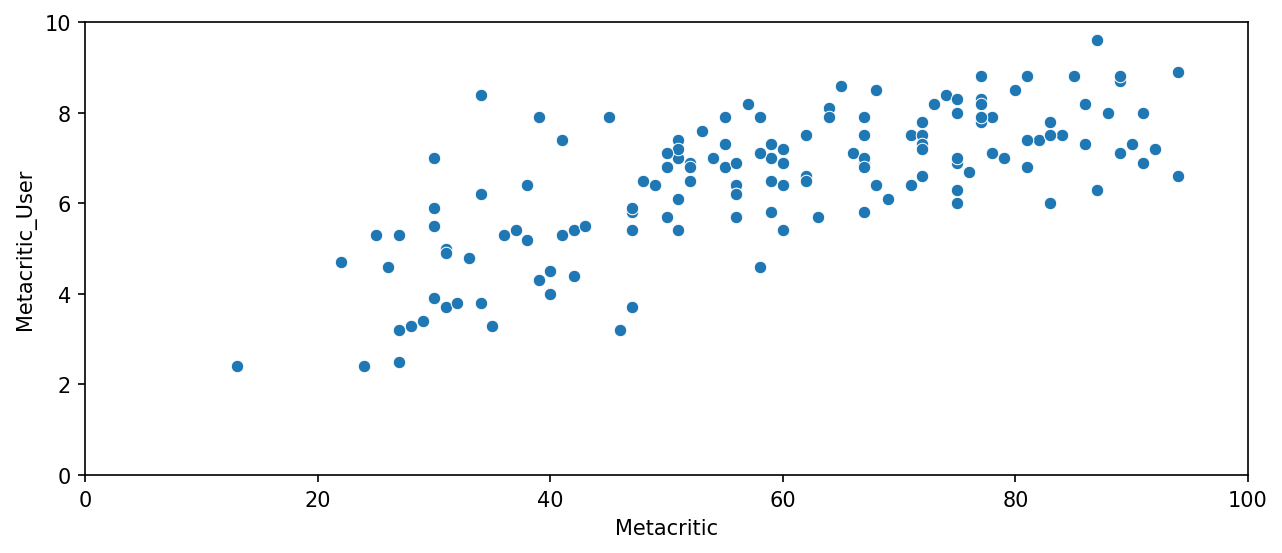

In [ ]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10); 

### IMBD

Finally, the data for IMDB are explored.

Note that both MetaCritic and IMDB report back vote counts. 

Below, a scatterplot shows the relationship between vote counts on MetaCritic versus vote counts on IMDB: 

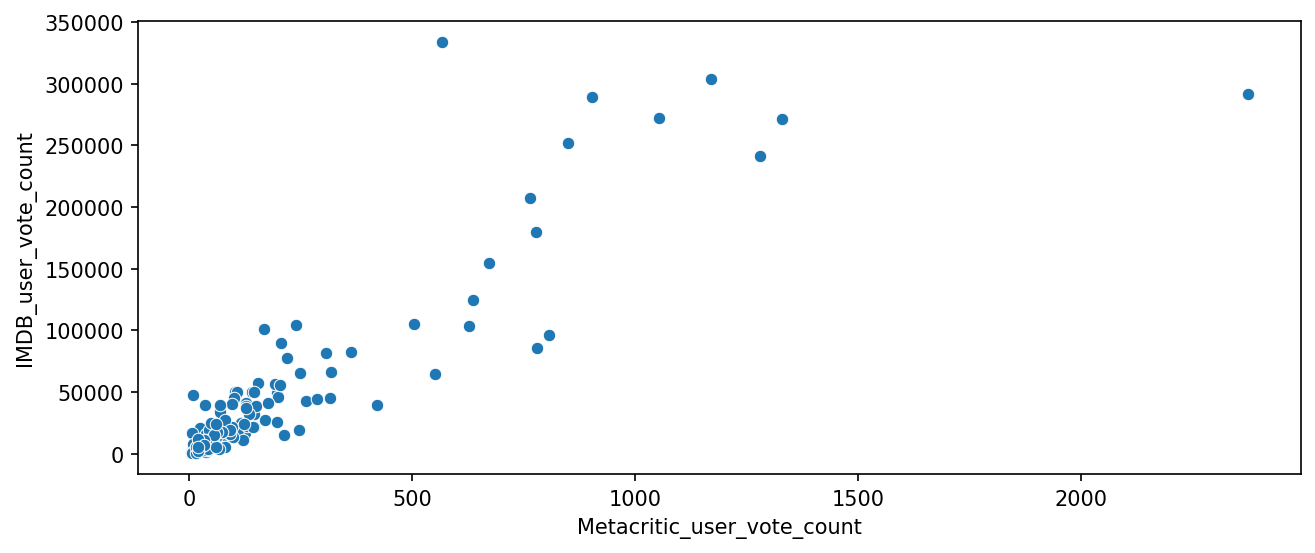

In [ ]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count'); 

Note that there are 2 outliers. The movie with the highest vote count on IMDB only has 500 Metacritic ratings.  

That movie is: 

In [ ]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


The movie with the highest Metacritic User Vote count: 

In [ ]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandango Scores vs. All Sites

Finally, the question of whether or not Fandango artifically displays higher ratings than warranted is explored. 

> Below, the Fandango table is combined with the All Sites table. Since some Fandango movies have very little or no reviews, they are not included.  An inner merge is used to join the tables.  

In [ ]:
df = pd.merge(fandango, all_sites, on='FILM', how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [ ]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8


### Normalize columns to Fandago STARS and RATINGS 0-5

Notice that RT, Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. 

In order to do a fair comparison, we need to normalize these values so they all fall between 0-5 stars, and the relationship between the reviews stays the same. 

In [ ]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [ ]:
df['Meta_Norm'] =  np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] =  np.round(df['Metacritic_User']/2,1)

In [ ]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [ ]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Now, a norm_scores DataFrame is created that only contains the normalized ratings. Both STARS and RATING from the original Fandango table are included: 

In [ ]:
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [ ]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites

Now the question of whether or not Fandango displays abnormally high ratings can be answered.  

Are Fandango's ratings themselves higher than average? 

Below, a plot is created showing the normalized ratings across all sites, using a KDE plot in seaborn: 

In [ ]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

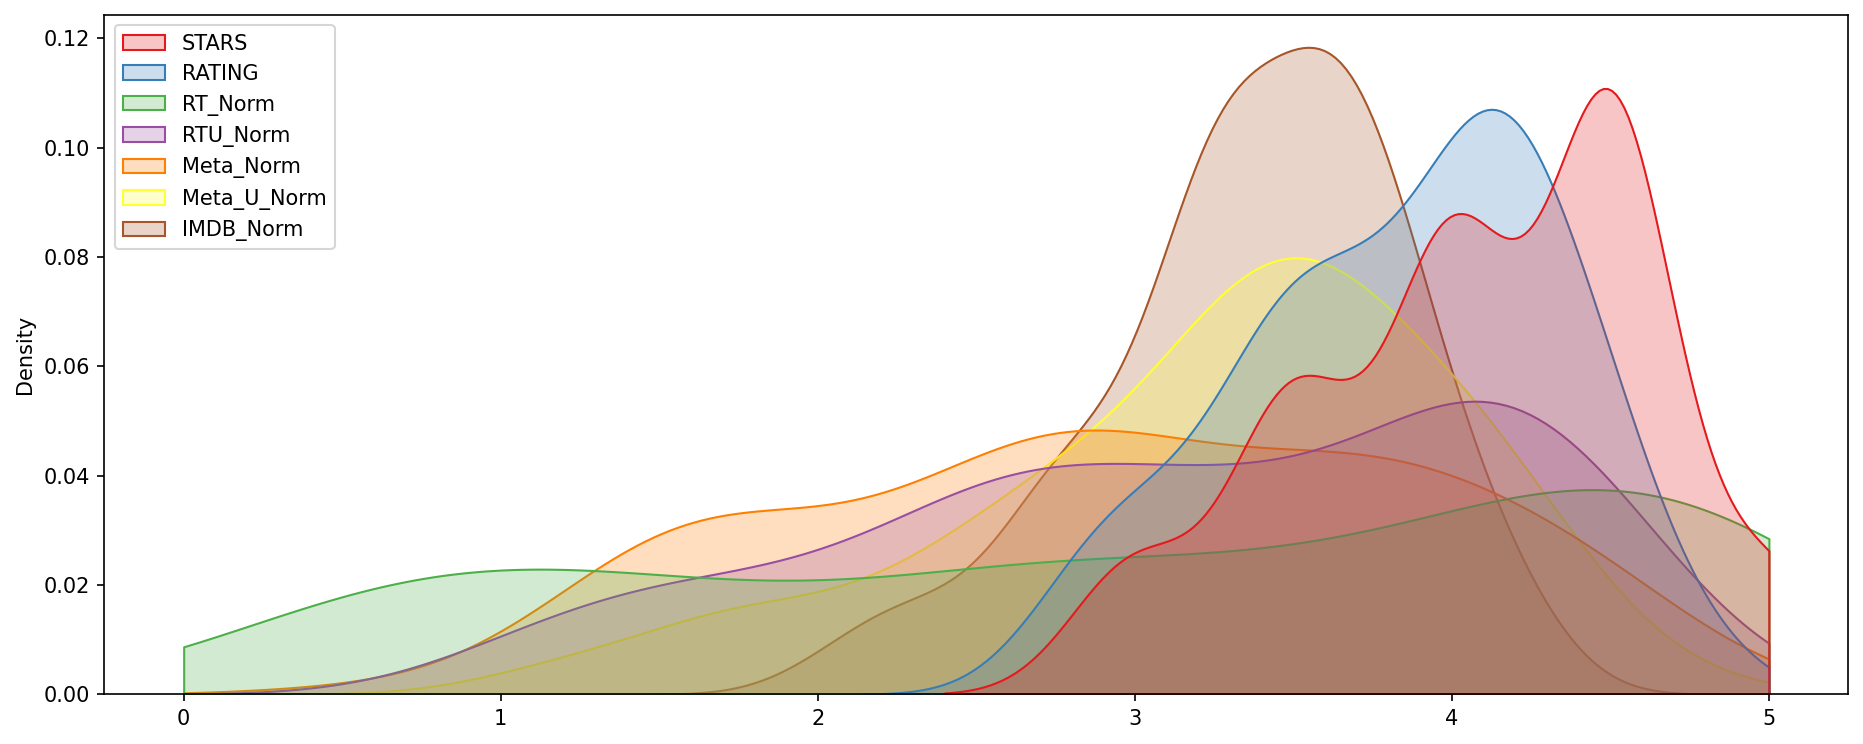

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

It's pretty obvious from this that Fandango has an uneven distribution. 

It seems that RT critics have the most uniform distribution. 

Below, the RT critic ratings are compared against the STARS displayed by Fandango: 

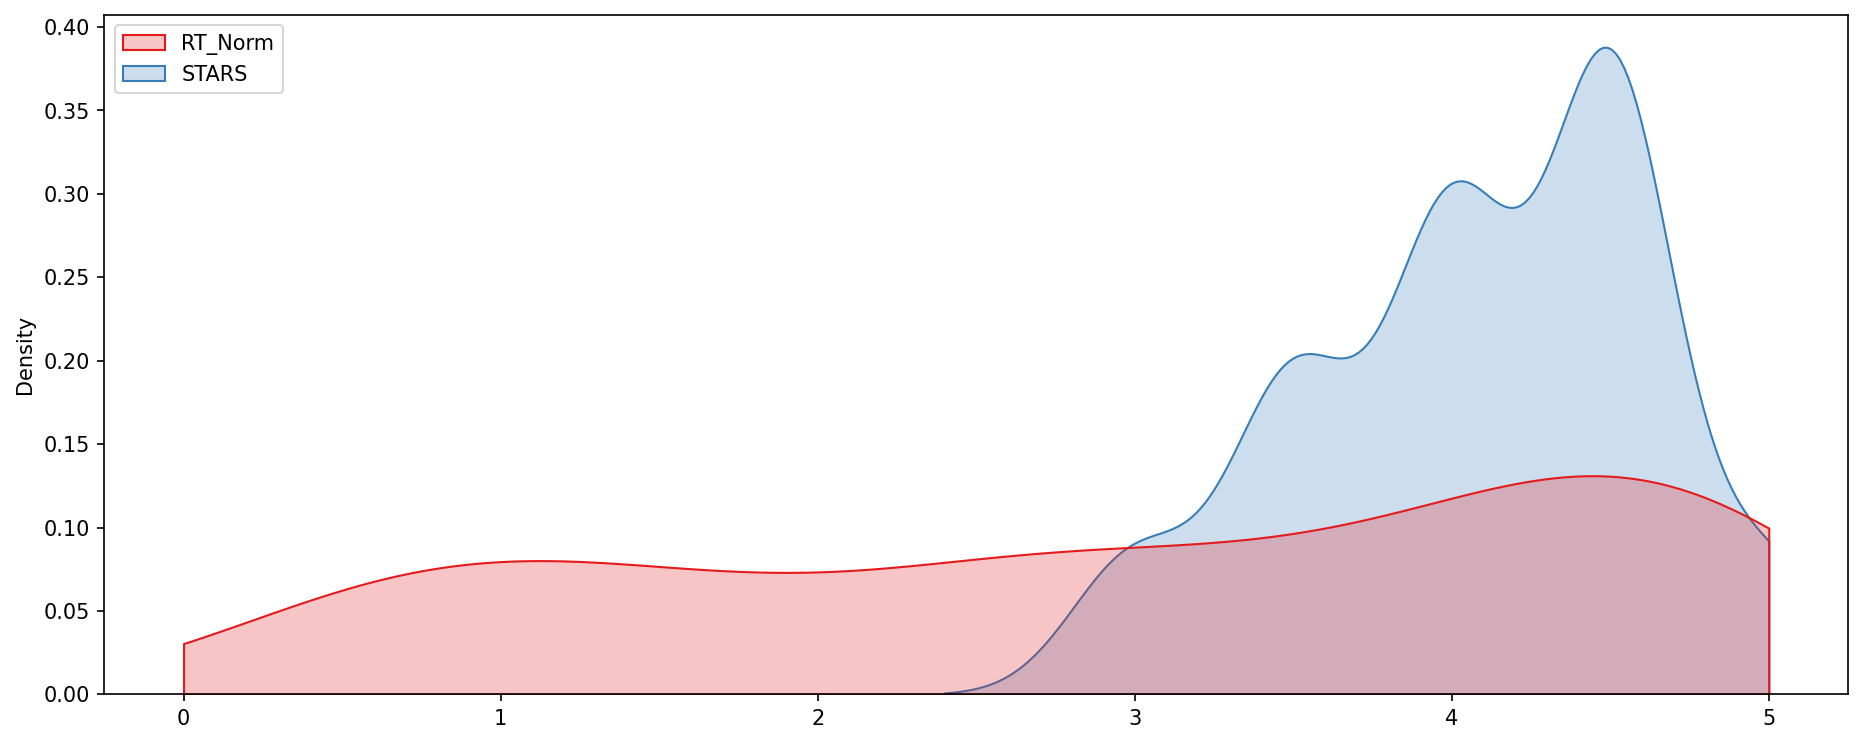

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

It seems that Fandango rates all films 2.5 stars or higher, even though there is a more uniform distribution for RT critics.  

### How are the worst movies rated across all plaforms? 

Below, a clustermap shows all of the normalized scores.  

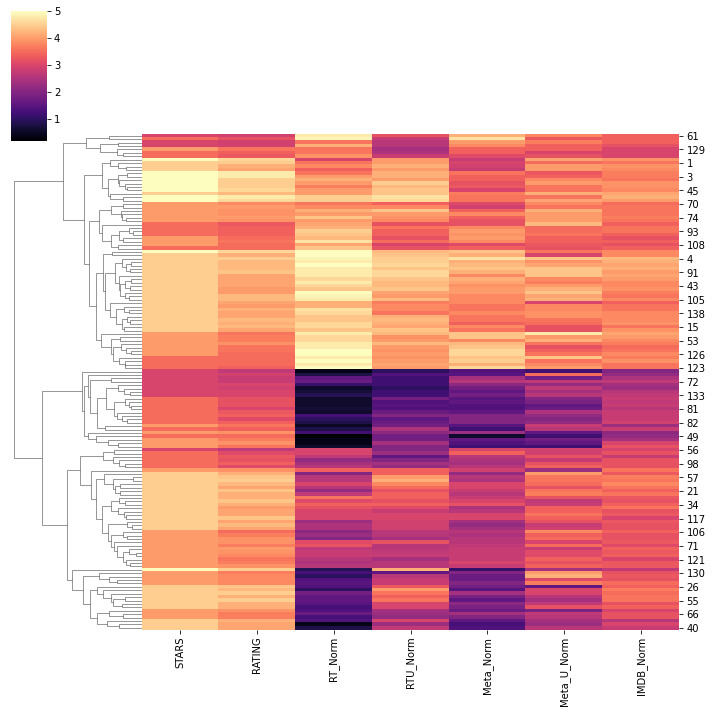

In [ ]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False); 

This too shows that Fandango, unlike the other rating sites, has almost no low-starred movies (note the lack of dark shading in the first two columns, representing STARS and RATINGS in Fandango)

Based off the Rotten Tomatoes critic ratings, what are the top 10 lowest rated movies, and what are the normalized scores across all plaforms for these movies? 

In [ ]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [ ]:
norm_films.nsmallest(10, 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


Finally, the distribution of ratings across all sites for the top 10 worse movies is visualized: 

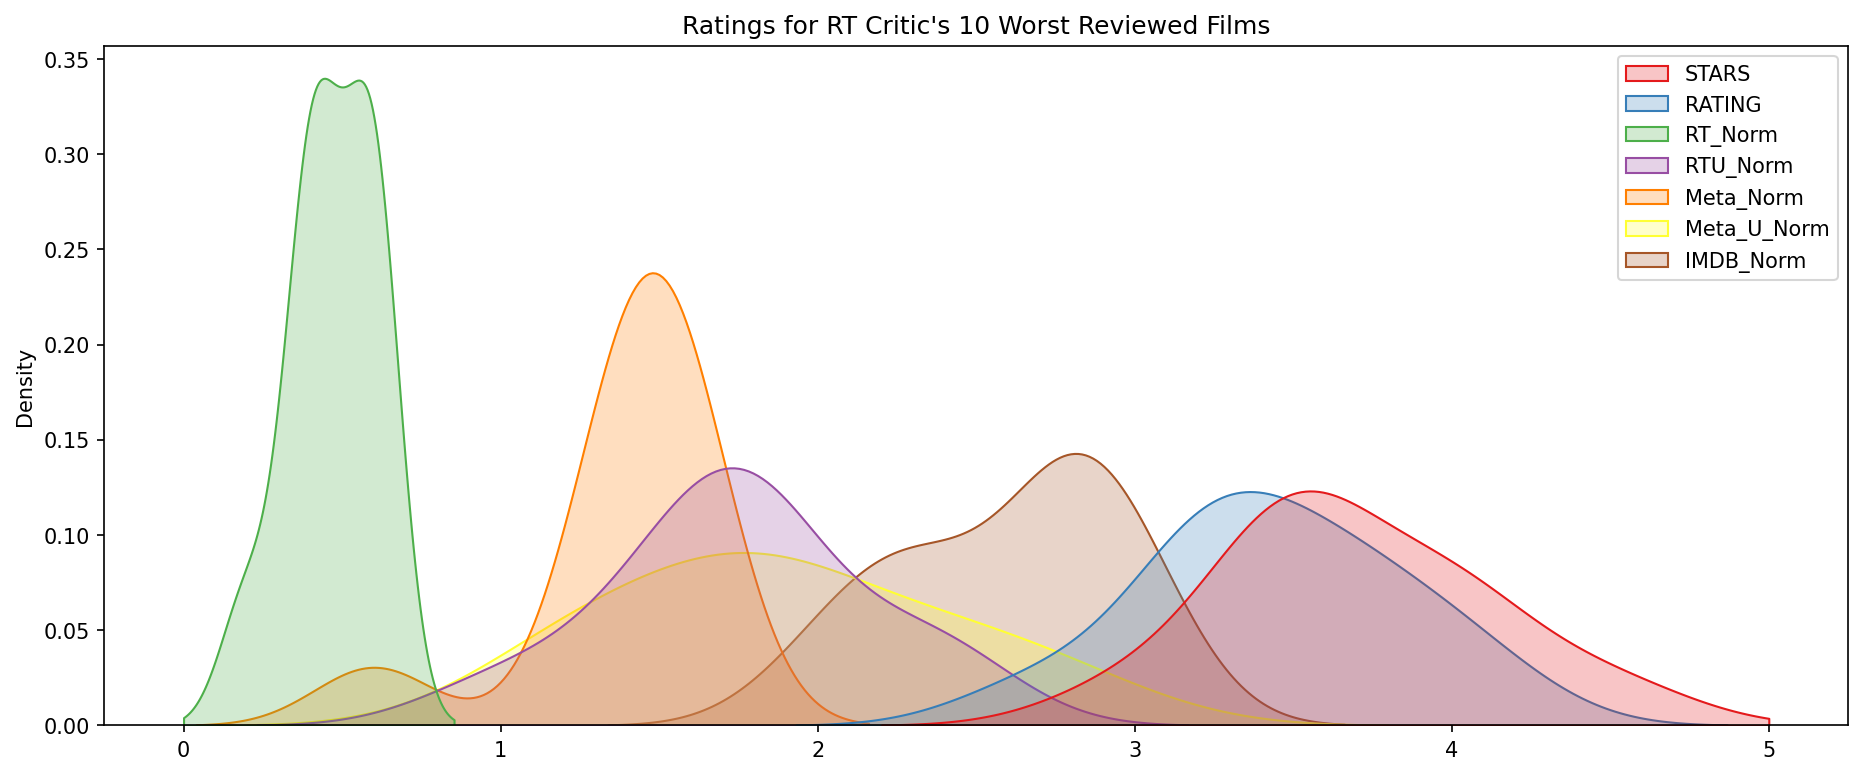

In [ ]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

## Conclusion

Note that Fandango is showing 3-4 star ratings for films that are clearly bad according to the other rating sites.  

Thus, at least when this data was pulled in 2015, Fandango is not to be trusted with ratings! 